In [103]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [43]:
from matplotlib import rcParams
rcParams['text.usetex'] = True
rcParams["text.latex.preamble"] = r"\usepackage{amsmath}\usepackage{amsfonts}"
%config InlineBackend.figure_format = 'retina'

In [2]:
# This is a simplified version of
# > https://github.com/profConradi/eigenfish

In [3]:
def generate_random_matrix(dimension = 3, realism = .5, min_value = -5, max_value = 5):
    real = np.random.randint(-5, 5, size=(dimension, dimension))
    imaginary = np.random.randint(-5, 5, size=(dimension, dimension)) * 1j
    return realism * real + (1 - realism) * imaginary

In [4]:
def choose_free_variables(dimension = 3):
    choices = [index for index in range(dimension**2)]
    free_variables = []
    while len(free_variables) < 2:
        choice = np.random.choice(choices)
        choices.remove(choice)
        free_variables.append(np.unravel_index(choice, (dimension, dimension)))
    return tuple(free_variables)

In [5]:
def get_eigenvalues(matrix, free_variables, r = 20, samples = 5000):
    eigenvalues = np.array([])
    for s in range(samples):
        t1 = np.random.normal(0, r)
        t2 = np.random.normal(0, r)
        matrix[free_variables] = (t1, t2)
        eigenvalues = np.append(eigenvalues, np.linalg.eigvals(matrix))
    return eigenvalues

In [148]:
def matrix_to_latex(matrix, free_variables = [], dimensions = 3, remove_inner_parenthesis = True):
    sympy_matrix = sp.Matrix(matrix)
    
    for i, free_variable in enumerate(free_variables):
        sympy_matrix[free_variable] = sp.symbols('t' + str(i + 1))
    
    return sp.latex(sympy_matrix, mode='inline')

In [210]:
def plot(matrix, free_variables, r = 20, steps = 20):
    figure, axes = plt.subplots(figsize=(20, 20))
    figure.set_facecolor('#e0c9a6')
    
    axes.set_title(matrix_to_latex(matrix, free_variables), fontsize=24, loc='center', y=.9)
    axes.set_axis_off()
    axes.set_xlim([(-1)*r, r])
    axes.set_ylim([(-1)*r, r])
    
    for layers in range(steps):
        eigenvalues = get_eigenvalues(matrix, free_variables)
        axes.scatter(eigenvalues.real, eigenvalues.imag, c='#3c2d15', s=0.03, alpha=.5)
    
    plt.annotate('Variation of Simone Conradi\'s work, 2023',  (200., 100.), xycoords="figure points", fontsize=16)
    plt.show()

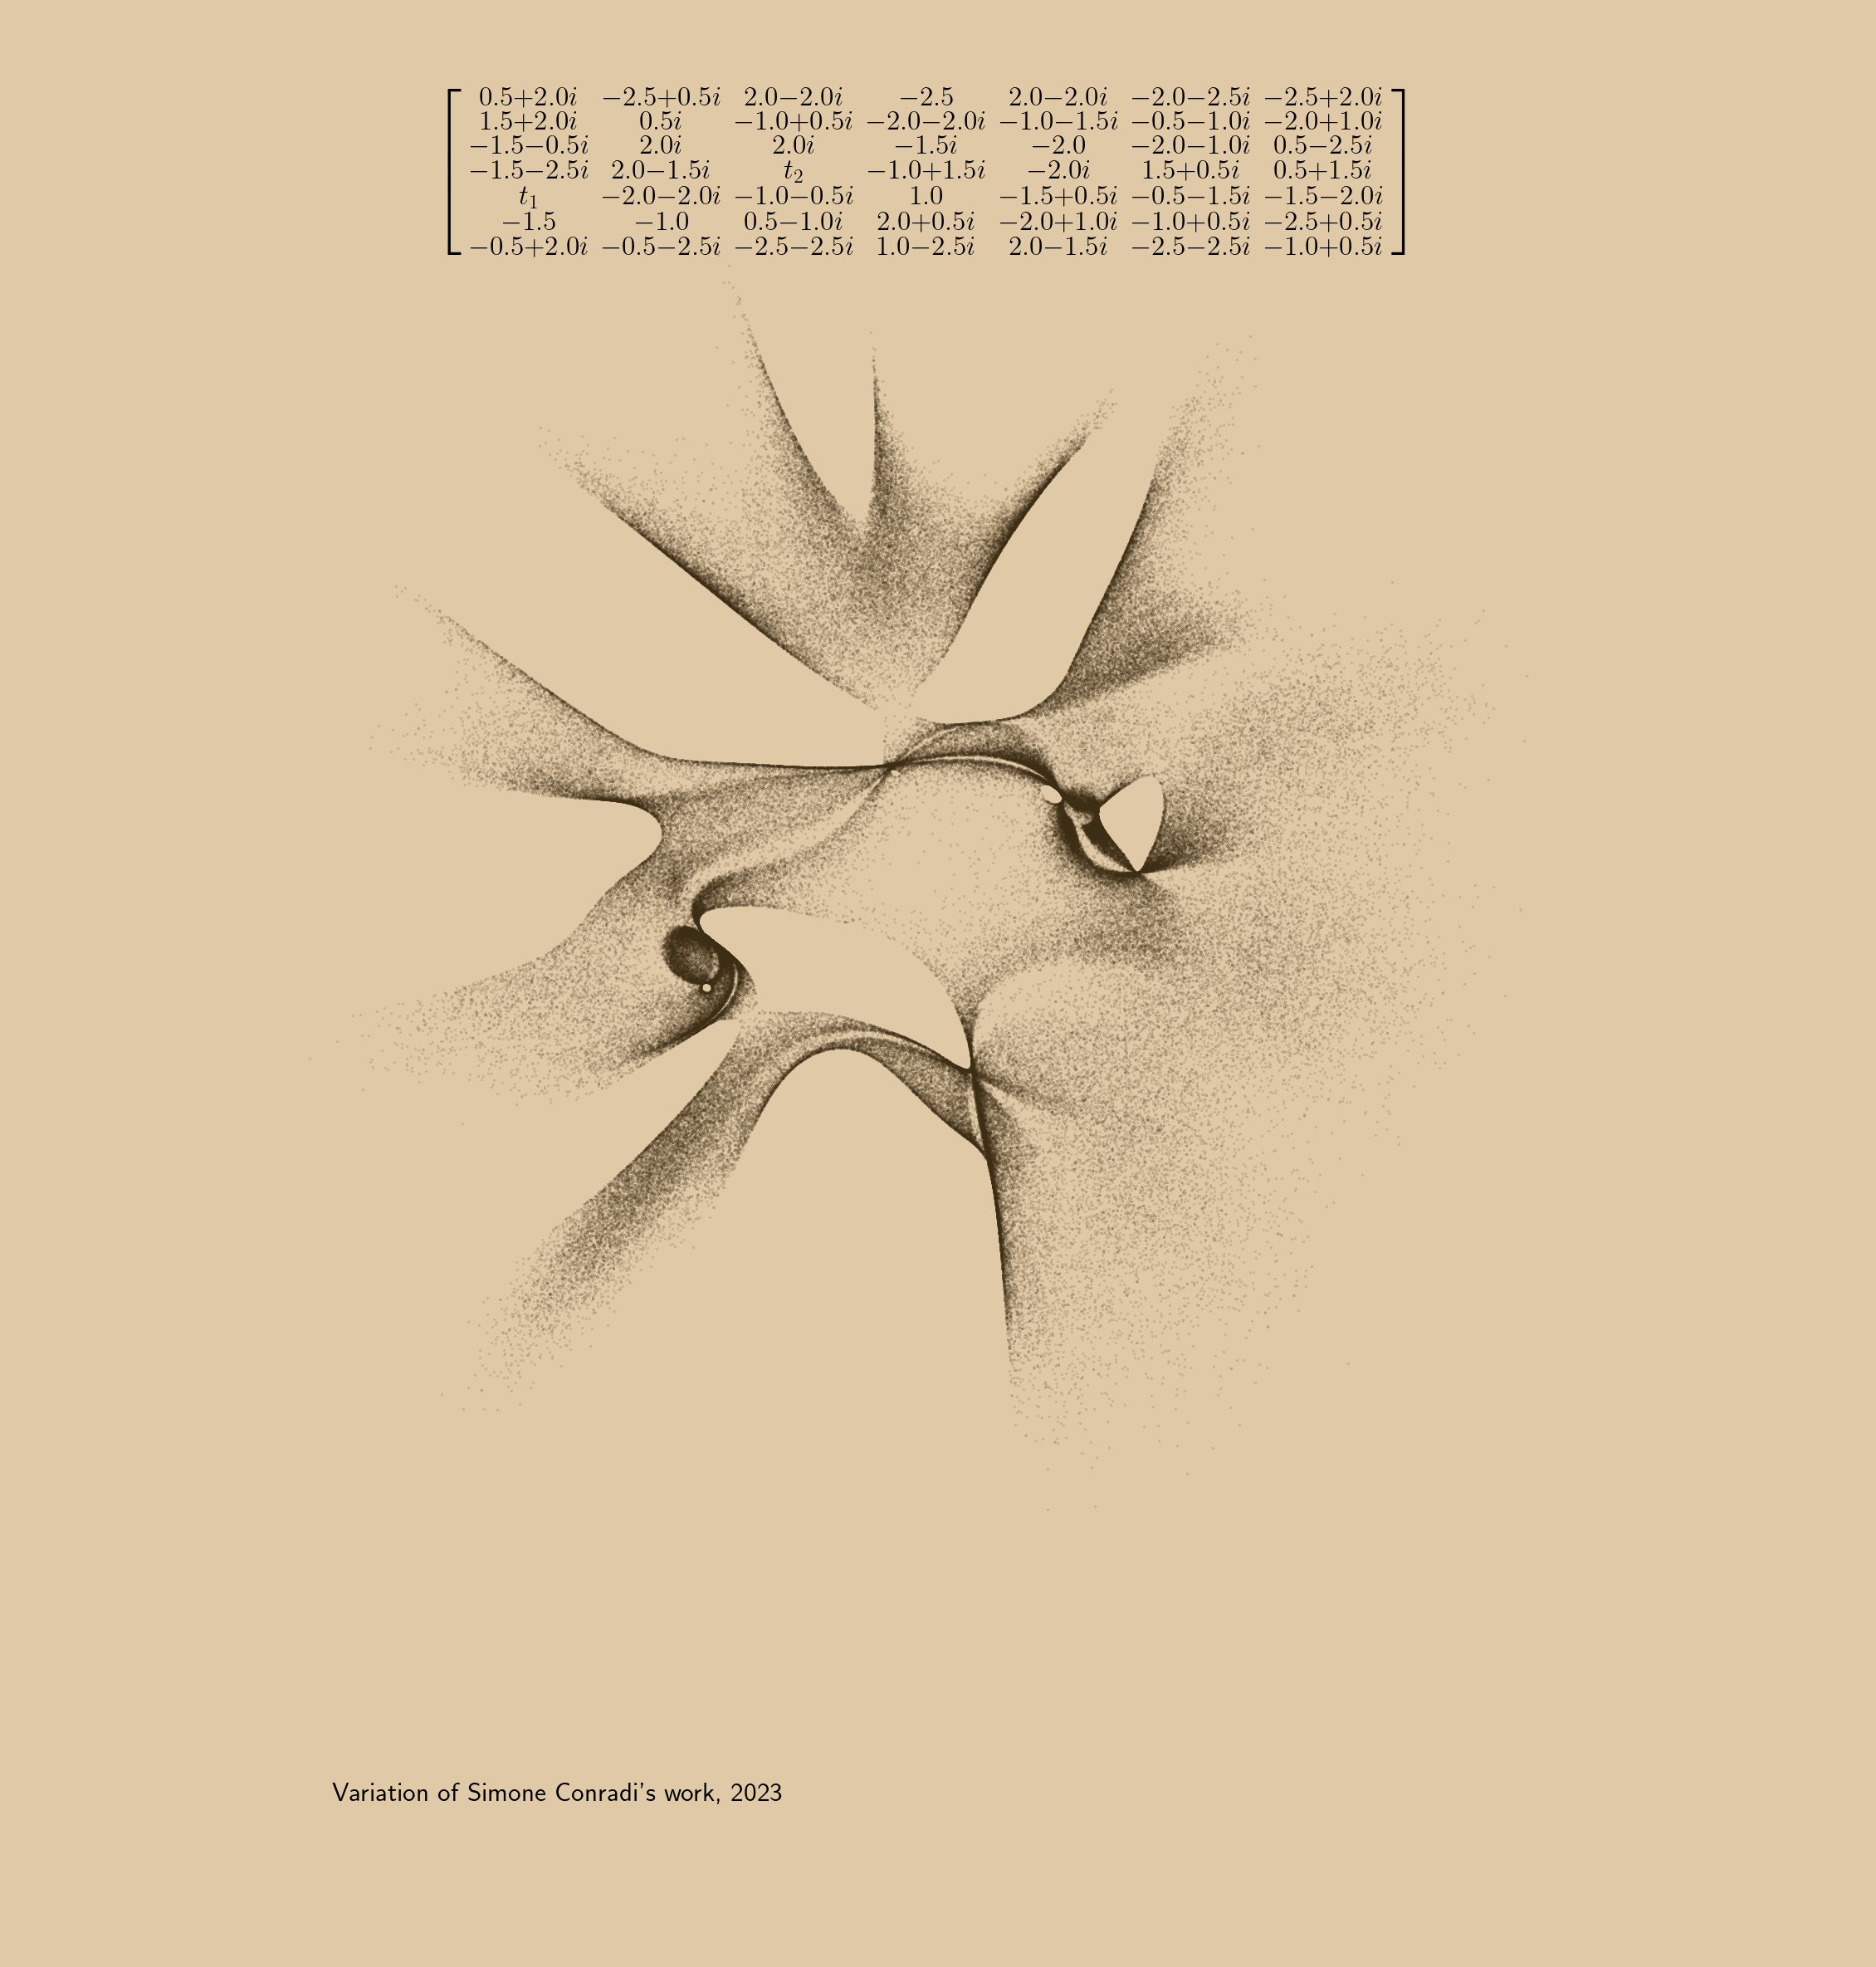

In [230]:
dimension = 7
matrix = generate_random_matrix(dimension)
free_variables = choose_free_variables(dimension)
plot(matrix, free_variables, steps = 5)

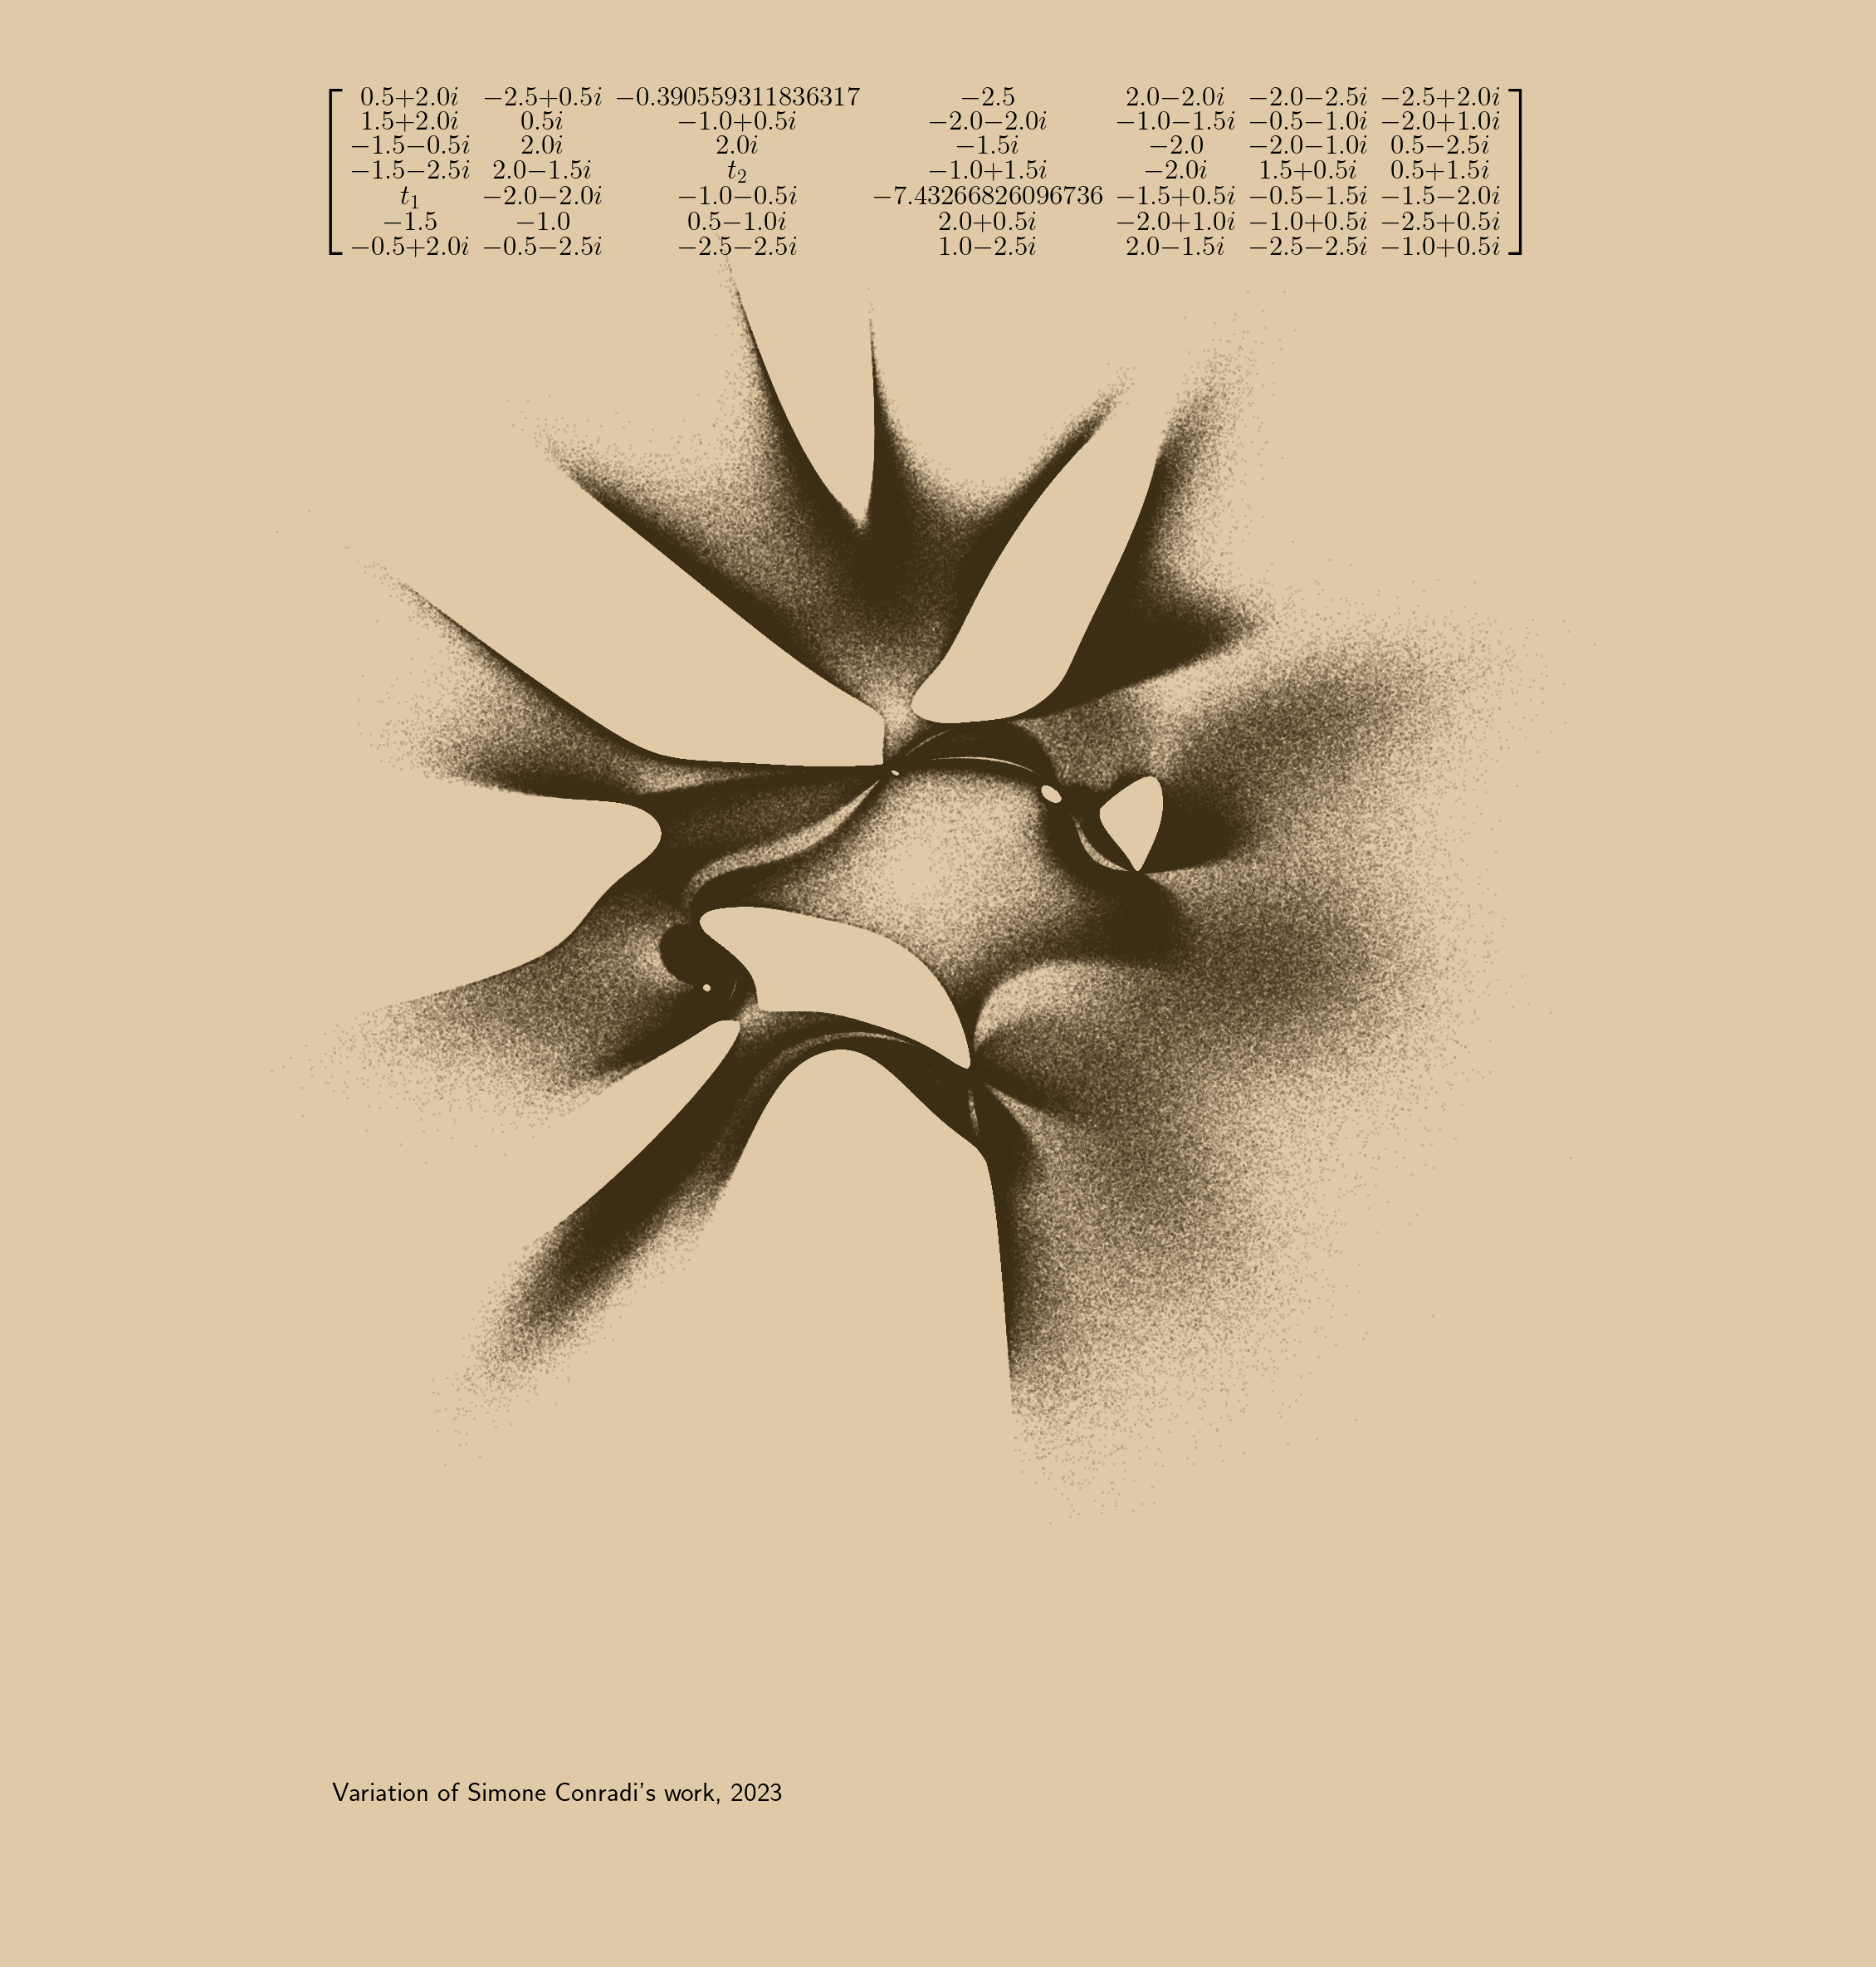

In [233]:
plot(matrix, free_variables, steps = 50)